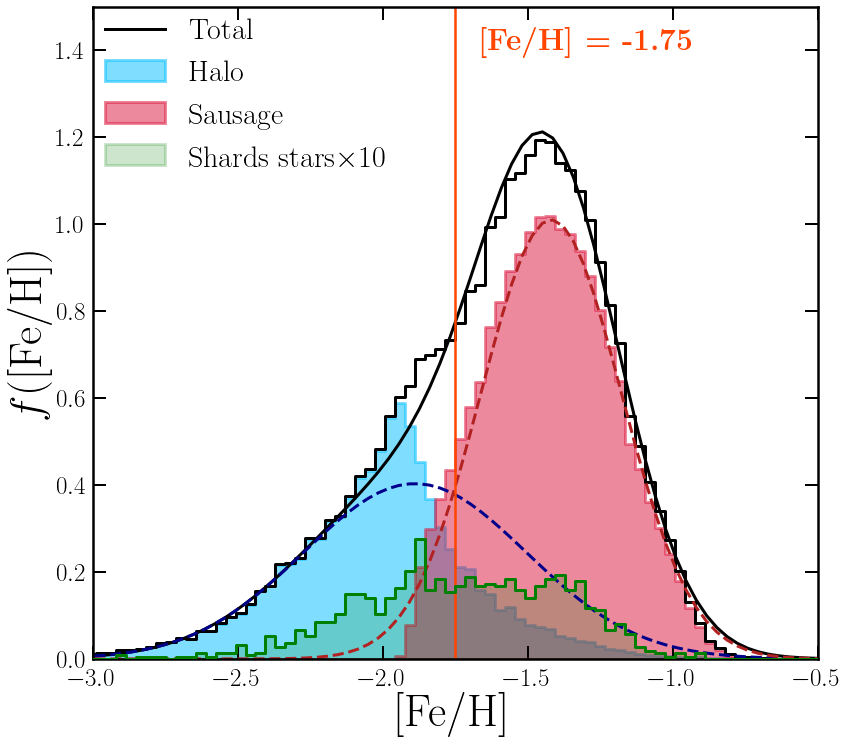

In [17]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy

df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()


xlab1 = r"[Fe/H]"
ylab1 = r"$f([$Fe/H$])$"
fig,ax1 = MySquarePlot(xlab1,ylab1)

nbins = 100
nfine = 100
feh_fine = linspace(-3.5,0,nfine)

h,fehe = histogram(df.feh,bins=nbins,normed=True)
fehc = (fehe[1:]+fehe[0:-1])/2.0

hS,_ = histogram(df_S.feh,bins=fehe,normed=True)

#plt.fill_between(fehc,h,lw=3,alpha=0.5,facecolor='Deepskyblue',edgecolor='Deepskyblue',label='Halo stars',step='pre')
plt.step(fehc,h,lw=3,color='k')



# Fit data
means_init = zeros(shape=(2,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,100.0,0.0,-1.95]) # Halo
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=2, covariance_type=covariance_type,means_init=means_init)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]


h1,_ = histogram(df.feh[Ps[:,0]<Ps[:,1]].as_matrix(),bins=fehe,normed=True)
plt.fill_between(fehc,ws[1]*h1/1.2,lw=3,alpha=0.5,facecolor='deepskyblue',edgecolor='deepskyblue',step='pre',label='Halo')
h2,_ = histogram(df.feh[Ps[:,1]<Ps[:,0]].as_matrix(),bins=fehe,normed=True)
plt.fill_between(fehc,ws[0]*h2,lw=3,alpha=0.5,facecolor='Crimson',edgecolor='Crimson',step='pre',label='Sausage')

plt.fill_between(fehc,10*hS*(1117.0/62000.0),alpha=0.2,lw=3,facecolor='Green',edgecolor='Green',label=r'Shards stars$\times$10',step='pre')
plt.step(fehc,10*hS*(1117.0/62000.0),lw=3,color='Green',zorder=5)


# Analytic models for metallicity
mu = meens[1,3]
sigsq = covs[1,3,3]
f1 = (1.0/sqrt(2*pi*sigsq))*exp(-(feh_fine-mu)**2.0/(2*sigsq))
f1 /= trapz(f1,feh_fine)

mu = meens[0,3]
sigsq = covs[0,3,3]
f0 = (1.0/sqrt(2*pi*sigsq))*exp(-(feh_fine-mu)**2.0/(2*sigsq))
f0 /= trapz(f0,feh_fine)

plt.plot(feh_fine,ws[0]*f0+ws[1]*f1,'k-',lw=3,label='Total')
plt.plot(feh_fine,ws[1]*f1,'k--',lw=3,color='Darkblue')
plt.plot(feh_fine,ws[0]*f0,'k--',lw=3,color='Firebrick')


fehmid = -1.75
plt.plot([-1.75,-1.75],[0,1.5],'-',color='orangered',lw=2.5)
plt.gcf().text(0.54,0.83,r'{\bf [Fe/H] = -1.75}',fontsize=30,color='orangered')
plt.legend(fontsize=30,frameon=False, loc=0, borderaxespad=0.)

ax1.set_ylim(bottom=0.0,top=1.5)
ax1.set_xlim([-3,-0.5])

pltname = 'fFeH'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')    

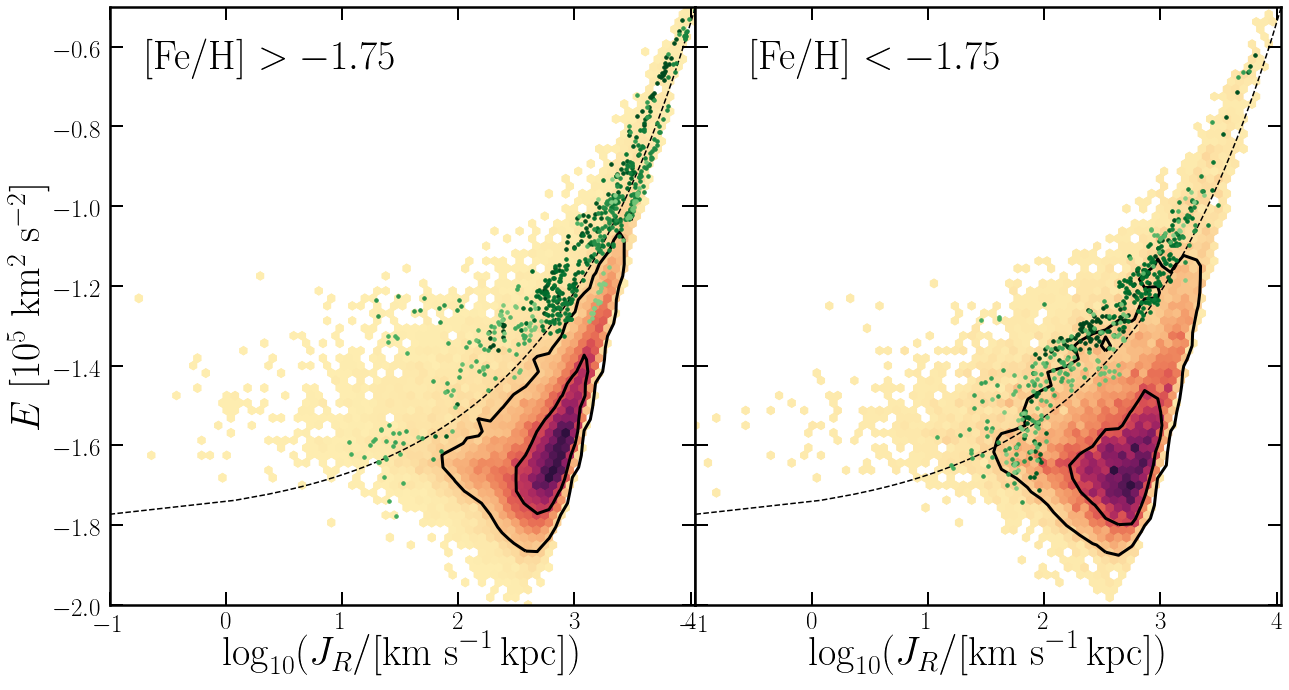

In [28]:
# Style
cmap = cmocean.cm.matter
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)
cont_col = 'k'
levels = [0.1,0.5,1.0]
gsize = 70
ncont_bins = 50
fig,ax1,ax2 = MyDoublePlot('',r'$E$ [$10^5$ km$^2$ s$^{-2}$]','','',wspace=0.0,lfs=40,size_x=21)


######JR
pltname = 'Action-JR-feh'
icol = 47
jmin = log10(0.1)
jmax = log10(11000.0)
xlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
# Line:
x = linspace(10.0**jmin,10.0**jmax,10000)
y = (x/5000)**(1.0/3.0)-1.8
ax1.plot(log10(x),y,'k--')
ax2.plot(log10(x),y,'k--')
plt.gcf().text(0.15,0.8,r'[Fe/H] $ >-1.75$',fontsize=40)
plt.gcf().text(0.55,0.8,r'[Fe/H] $ <-1.75$',fontsize=40)


#Jphi
# pltname = 'Action-Jphi-feh'
# icol = 48
# jmin = -4900.0
# jmax = 4900.0
# xlab = '$J_\phi$ [km s$^{-1}$ kpc]'
# plt.gcf().text(0.36,0.17,r'[Fe/H] $>-1.75$',fontsize=35)
# plt.gcf().text(0.75,0.17,r'[Fe/H] $<-1.75$',fontsize=35)


# #Jz
# pltname = 'Action-Jz-feh'
# icol = 49
# jmin = 0.0
# jmax = 5000.0
# xlab = '$J_z$ [km s$^{-1}$ kpc]'
# plt.gcf().text(0.36,0.17,r'[Fe/H] $>-1.75$',fontsize=35)
# plt.gcf().text(0.75,0.17,r'[Fe/H] $<-1.75$',fontsize=35)


######
Emax = -0.5
Emin = -2.0
df1 = df.loc[(df['feh'] > fehmid)]
df2 = df.loc[(df['feh'] < fehmid)]
E1 = (df1.E/1e5).as_matrix()
J1 = (df1.iloc[:,icol]).as_matrix()
E2 = (df2.E/1e5).as_matrix()
J2 = (df2.iloc[:,icol]).as_matrix()
if icol==47:
    J1 = log10(J1)
    J2 = log10(J2)


ax1.set_xlabel(xlab,fontsize=40)
ax2.set_xlabel(xlab,fontsize=40)
# Load Shards

# Plot halo stars
ax1.hexbin(J1,E1,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(J1,E1,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(J1,E1,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(J1,E1,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax2.hexbin(J2,E2,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(J2,E2,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(J2,E2,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(J2,E2,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

#x1,y1,dens1 = PointScatter(J2,E2)
#ax2.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)

# Plot contours
H,x1,y1 = histogram2d(J1,E1,range=[[jmin,jmax],[Emin,Emax]],bins=ncont_bins)
ax1.contour((x1[1:]+x1[0:-1])/2,(y1[1:]+y1[0:-1])/2,H.T/amax(H),levels=levels,colors=cont_col,linestyles='solid',linewidths=3)
H,x1,y1 = histogram2d(J2,E2,range=[[jmin,jmax],[Emin,Emax]],bins=ncont_bins-5)
ax2.contour((x1[1:]+x1[0:-1])/2,(y1[1:]+y1[0:-1])/2,H.T/amax(H),levels=levels,colors=cont_col,linestyles='solid',linewidths=3)

# Plot shards
Examples = names[:]
n_ex = size(Examples)
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+40)))
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df.loc[around(df.ra,8).isin(Cand.ra)]
    Cand1 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
    Cand2 = df2.loc[around(df2.ra,8).isin(Cand.ra)]
    e0 = (Cand0.E/1e5).as_matrix()
    j0 = (Cand0.iloc[:,icol]).as_matrix()
    e1 = (Cand1.E/1e5).as_matrix()
    j1 = (Cand1.iloc[:,icol]).as_matrix()
    e2 = (Cand2.E/1e5).as_matrix()
    j2 = (Cand2.iloc[:,icol]).as_matrix()
    if icol==47:
        j1 = log10(j1)
        j2 = log10(j2)
    ax1.plot(j1,e1,'.',color=col_ex[i,:],markersize=7)    
    ax2.plot(j2,e2,'.',color=col_ex[i,:],markersize=7)


ax1.set_xlim([jmin,jmax])
ax2.set_xlim([jmin,jmax])
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax2.set_yticklabels([])

# Save
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            

In [19]:
means_init = zeros(shape=(2,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,100.0,0.0,-1.95]) # Halo
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=2, covariance_type=covariance_type,means_init=means_init,tol=1e-6)
clf.fit(data)
Ps = clf.predict_proba(data)

rlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}(J_z/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
Emax = -0.5
Emin = -2.0
jrmin = 1.0
jrmax = 10000.0
jpmin = -4900.0
jpmax = 4900.0
jzmin = 1.0
jzmax = 5000.0

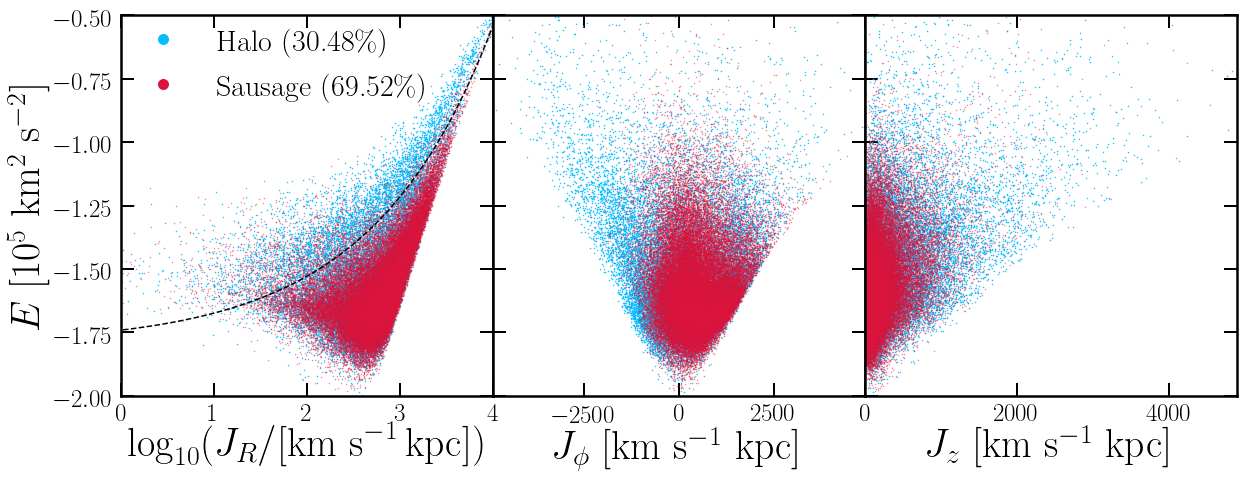

In [29]:
fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.0,lfs=40)

# choose cut
cut = Ps[:,1]<Ps[:,0]
eta1 = 100*sum(cut)/(1.0*shape(df)[0])
eta2 = 100.0-eta1

df1 = df.loc[cut]
df2 = df.loc[~cut]
E1 = (df1.E/1e5).as_matrix()
Jr1 = (df1.JR).as_matrix()
Jp1 = (df1.Jphi).as_matrix()
Jz1 = (df1.Jz).as_matrix()
E2 = (df2.E/1e5).as_matrix()
Jr2 = (df2.JR).as_matrix()
Jp2 = (df2.Jphi).as_matrix()
Jz2 = (df2.Jz).as_matrix()

ax1.plot(log10(Jr2),E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax1.plot(log10(Jr1),E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)
x = linspace(10.0**jmin,10.0**jmax,10000)
y = (x/5000)**(1.0/3.0)-1.8
ax1.plot(log10(x),y,'k--')

ax2.plot(Jp2,E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax2.plot(Jp1,E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)

ax3.plot(log10(Jz2),E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax3.plot(log10(Jz1),E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)

ax3.plot(-1,100,'.',color='deepskyblue',markersize=20,rasterized=True,label=r'Halo ('+r'{:.2f}'.format(eta2)+'\%) ')
ax3.plot(-1,100,'.',color='crimson',markersize=20,rasterized=True,label=r'Sausage ('+r'{:.2f}'.format(eta1)+'\%) ')
plt.legend(fontsize=30,frameon=False,bbox_to_anchor=(-2.0, 1.0), loc=2, borderaxespad=0.)


# # Plot shards
# Examples = names[0:10]
# n_ex = size(Examples)
# for i in range(0,n_ex):
#     namei = Examples[i]
#     Cand = df_S.loc[df_S['group_id'] == namei]
#     Cand1 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
#     Cand2 = df2.loc[around(df2.ra,8).isin(Cand.ra)]
#     e1 = (Cand1.E/1e5).as_matrix()
#     jr1 = (Cand1.iloc[:,icol]).as_matrix()
#     e2 = (Cand2.E/1e5).as_matrix()
#     jr2 = (Cand2.JR).as_matrix()

#     ax1.plot(log10(jr2),e2,'o',color='deepskyblue',markersize=2,markerfacecolor='none')
#     ax1.plot(log10(jr1),e1,'o',color='crimson',markersize=2,markerfacecolor='none')    

ax2.set_yticklabels([])
ax3.set_yticklabels([])

   
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

ax1.set_xlim([log10(jrmin),log10(jrmax)])
ax2.set_xlim([jpmin,jpmax])
ax3.set_xlim([log10(jzmin),log10(jzmax)])

# Save
pltname = 'Actions-SausageHalo'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  

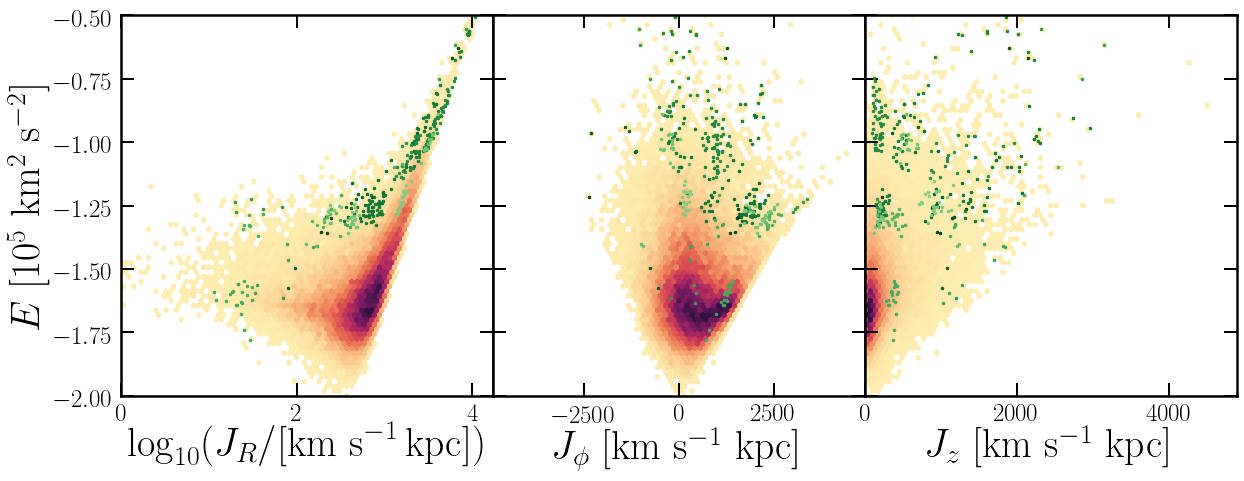

In [31]:
fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.0,lfs=40)

# choose cut
cut = Ps[:,1]<Ps[:,0]


df1 = df.loc[cut]
E1 = (df1.E/1e5).as_matrix()
Jr = (df1.JR).as_matrix()
Jp = (df1.Jphi).as_matrix()
Jz = (df1.Jz).as_matrix()

# Plot halo stars
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)


ax2.set_yticklabels([])
ax3.set_yticklabels([])


# Plot shards
Examples = names[:]
n_ex = size(Examples)
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+40)))
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
    e0 = (Cand0.E/1e5).as_matrix()
    jr = (Cand0.JR).as_matrix()
    jp = (Cand0.Jphi).as_matrix()
    jz = (Cand0.Jz).as_matrix()

    ax1.plot(log10(jr),e0,'.',color=col_ex[i,:],markersize=5)    
    ax2.plot(jp,e0,'.',color=col_ex[i,:],markersize=5)
    ax3.plot(jz,e0,'.',color=col_ex[i,:],markersize=5)
    
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

# Save
pltname = 'Actions-Halo'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  

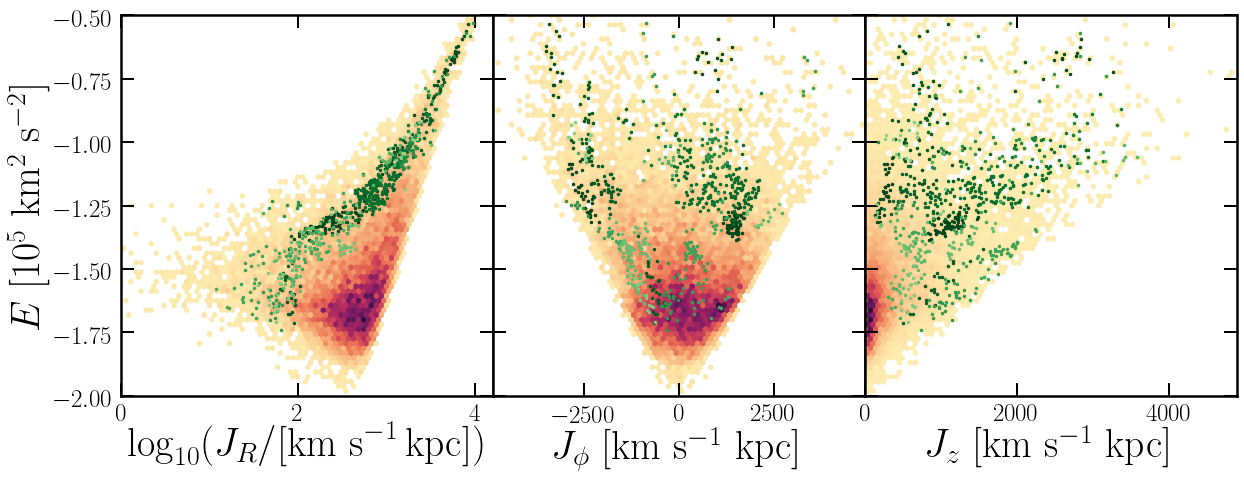

In [32]:
fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.0,lfs=40)

# choose cut
cut = Ps[:,0]<Ps[:,1]

Emax = -0.5
Emin = -2.0
df1 = df.loc[cut]
E1 = (df1.E/1e5).as_matrix()
Jr = (df1.JR).as_matrix()
Jp = (df1.Jphi).as_matrix()
Jz = (df1.Jz).as_matrix()

jrmin = 1.0
jrmax = 10000.0
jpmin = -4900.0
jpmax = 4900.0
jzmin = 0.0
jzmax = 4900.0

# Plot halo stars
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
#x1,y1,dens1 = PointScatter(Jz,E1)
#ax3.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)


ax2.set_yticklabels([])
ax3.set_yticklabels([])


# Plot shards
Examples = names[:]
n_ex = size(Examples)
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+40)))
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
    e0 = (Cand0.E/1e5).as_matrix()
    jr = (Cand0.JR).as_matrix()
    jp = (Cand0.Jphi).as_matrix()
    jz = (Cand0.Jz).as_matrix()

    ax1.plot(log10(jr),e0,'.',color=col_ex[i,:],markersize=5)    
    ax2.plot(jp,e0,'.',color=col_ex[i,:],markersize=5)
    ax3.plot(jz,e0,'.',color=col_ex[i,:],markersize=5)

ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

# Save
pltname = 'Actions-Sausage'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  

In [ ]:
means_init = zeros(shape=(2,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-1.95]) # Halo
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=2, covariance_type=covariance_type,means_init=means_init)
clf.fit(data)



rlab = '$J_R$ [km s$^{-1}$ kpc]'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = '$J_z$ [km s$^{-1}$ kpc]'

fig,ax1,ax2,ax3 = MyTriplePlot(rlab,r'$E$ [$10^5$ km$^2$ s$^2$]',plab,'',zlab,'',wspace=0.0,lfs=40)

# Choose cut to do
cut = ((df.E+10)/1.0e5)>((df.JR/5000)**(1.0/3.0)-1.9)
x = linspace(1.0,10000,1000)
y = ((x+10)/5000)**(1.0/3.0)-1.9
ax1.plot(log10(x),y,'k--',lw=2)

Emax = -0.5
Emin = -2.0
df1 = df.loc[:]
E1 = (df1.E/1e5).as_matrix()
Jr = (df1.JR).as_matrix()
Jp = (df1.Jphi).as_matrix()
Jz = (df1.Jz).as_matrix()

jrmin = 1.0
jrmax = 10000.0
jpmin = -4900.0
jpmax = 4900.0
jzmin = 0.0
jzmax = 4900.0

# Plot halo stars
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax1.hexbin(log10(Jr),E1,extent=(log10(jrmin),log10(jrmax),Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)



ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(Jp,E1,extent=(jpmin,jpmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(Jz,E1,extent=(jzmin,jzmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
#x1,y1,dens1 = PointScatter(Jz,E1)
#ax3.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)


ax2.set_yticklabels([])
ax3.set_yticklabels([])


# Plot shards
Examples = names[:]
n_ex = size(Examples)
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+40)))
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df.loc[around(df.ra,8).isin(Cand.ra)]
    e0 = (Cand0.E/1e5).as_matrix()
    jr = (Cand0.JR).as_matrix()
    jp = (Cand0.Jphi).as_matrix()
    jz = (Cand0.Jz).as_matrix()

    ax1.plot(log10(jr),e0,'.',color=col_ex[i,:],markersize=3)    
    ax2.plot(jp,e0,'.',color=col_ex[i,:],markersize=3)
    ax3.plot(jz,e0,'.',color=col_ex[i,:],markersize=3)
    
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

plt.show()

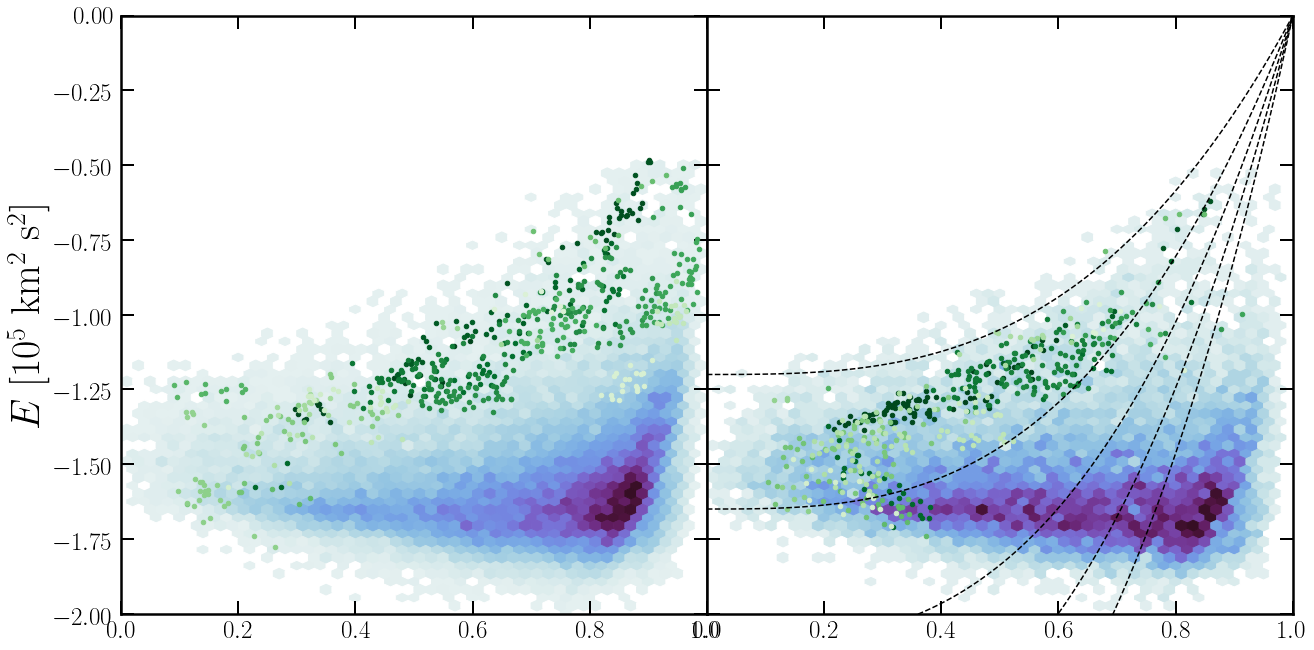

In [72]:
fig,ax1,ax2 = MyDoublePlot('',r'$E$ [$10^5$ km$^2$ s$^2$]','','',wspace=0.0,lfs=40,size_x=21)

gsize=50

ecc = df1.eccent
E = df1.E/1.0e5
ax1.hexbin(ecc,E,extent=(0,1,Emin,Emax),gridsize=gsize,cmap=cmap,vmin=0.01)

# Plot shards
Examples = names[:]
n_ex = size(Examples)
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+10)))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
    e0 = Cand0.E/1e5
    ecc0 = Cand0.eccent
    ax1.plot(ecc0,e0,'.',color=col_ex[i,:],markersize=9)
        



ecc = df2.eccent
E = df2.E/1.0e5
ax2.hexbin(ecc,E,extent=(0,1,Emin,Emax),gridsize=gsize,cmap=cmap,vmin=0.01)

# Plot shards
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df2.loc[around(df2.ra,8).isin(Cand.ra)]
    e0 = Cand0.E/1e5
    ecc0 = Cand0.eccent
    ax2.plot(ecc0,e0,'.',color=col_ex[i,:],markersize=9)

    
evals = linspace(0,1,100)
for A in linspace(1.2,3.0,5):
    ax2.plot(evals,A*(evals**3.0-1),'k--')
    
ax2.set_yticklabels([])   
ax1.set_ylim([-2,0])
ax2.set_ylim([-2,0])
ax1.set_xlim([0,1])
ax2.set_xlim([0,1])

plt.show()

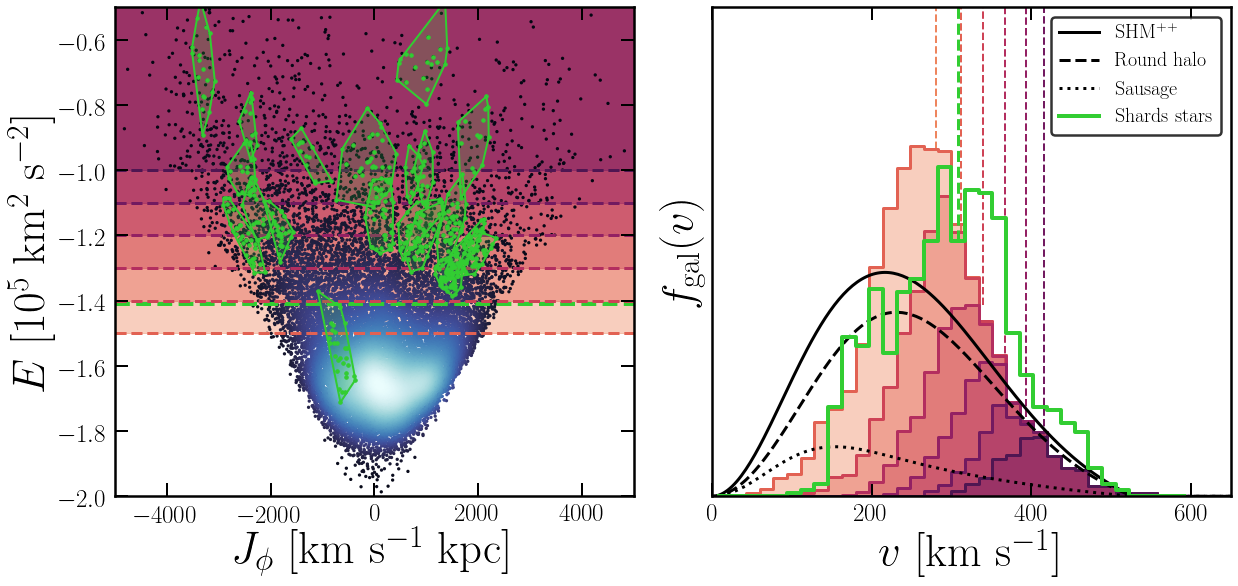

In [44]:
xlab1 = r'$J_\phi$ [km s$^{-1}$ kpc]'
ylab1 = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
xlab2 = r"$v$ [km s$^{-1}$]"
ylab2 = r"$f_{\rm gal}(v)$"
fig,ax1,ax2 = MyDoublePlot(xlab1,ylab1,xlab2,ylab2,wspace=0.15,size_y=9)


df = pandas.read_csv('../data/Gaia-SDSS.csv')
dfc = df.loc[(Ps[:,0]<Ps[:,1])]

x1,y1,dens1 = PointScatter((dfc.Jphi).as_matrix(),(dfc.E/1e5).as_matrix())
ax1.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)

jphimin = -5000.0
jphimax = 5000.0
Emin = -2.0
Emax = -0.5
ax1.set_ylim([Emin,Emax])
ax1.set_xlim([jphimin,jphimax])


# Plot some shards
shards_color = 'limegreen'
Examples = names[0:20]
n_ex = size(Examples)
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    Ec = (Cand_matched.E/1e5).tolist()
    jr = (Cand_matched.JR).tolist()
    jphi = (Cand_matched.Jphi).tolist()
    jz = (Cand_matched.Jz).tolist()
    ax1.plot(jphi,Ec,'.',color=shards_color,markersize=7)
    
    points = array([jphi,Ec]).T
    hull = ConvexHull(points)
    x_edge = points[hull.vertices,0]
    y_edge = points[hull.vertices,1]
    ax1.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.2,color=shards_color,zorder=2)
    ax1.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=shards_color,lw=2,zorder=2)

    
# Second plott
def speeds(dfc):
    return sqrt((dfc.GalRVel)**2.0+(dfc.GalphiVel)**2.0+(dfc.GalzVel)**2.0)
  
n = 300
v = linspace(0.01,850.0,n)
v0 = SHMpp.RotationSpeed
v_esc = SHMpp.EscapeSpeed
sig_beta = SHMpp.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)
eta = 0.2
SCO = True
fv_Iso_gal = SpeedDist_Triaxial(v,0,sig_iso,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_gal = SpeedDist_Triaxial(v,0,sig_beta,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_gal + eta*fv_Saus_gal

# Shards
nbins = 35
vv = sqrt((df_S.GalRVel)**2.0+(df_S.GalTVel)**2.0+(df_S.GalzVel)**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,600))
vc = (vbins[1:]+vbins[0:-1])/2
    
df_E0 = dfc.loc[(df['E'] > -1.5e5)]
df_E1 = dfc.loc[(df['E'] > -1.4e5)]
df_E2 = dfc.loc[(df['E'] > -1.3e5)]
df_E3 = dfc.loc[(df['E'] > -1.2e5)]
df_E4 = dfc.loc[(df['E'] > -1.1e5)]
df_E5 = dfc.loc[(df['E'] > -1.0e5)]

h_E0,_ = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,600))
h_E1,_ = histogram(speeds(df_E1),bins=nbins,normed=True,range=(0,600))
h_E2,_ = histogram(speeds(df_E2),bins=nbins,normed=True,range=(0,600))
h_E3,_ = histogram(speeds(df_E3),bins=nbins,normed=True,range=(0,600))
h_E4,_ = histogram(speeds(df_E4),bins=nbins,normed=True,range=(0,600))
h_E5,_ = histogram(speeds(df_E5),bins=nbins,normed=True,range=(0,600))

h_E0 *= (shape(df_E0)[0])/(1.0*shape(df_E0)[0])
h_E1 *= (shape(df_E1)[0])/(1.0*shape(df_E0)[0])
h_E2 *= (shape(df_E2)[0])/(1.0*shape(df_E0)[0])
h_E3 *= (shape(df_E3)[0])/(1.0*shape(df_E0)[0])
h_E4 *= (shape(df_E4)[0])/(1.0*shape(df_E0)[0])
h_E5 *= (shape(df_E5)[0])/(1.0*shape(df_E0)[0])

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
coff = 3
alph = 0.4

ax1.fill_between([jphimin,jphimax],[-1.0,-1.0],y2=0.0,color=col_ex[5+coff,:],alpha=alph,zorder=-1)
ax1.fill_between([jphimin,jphimax],[-1.1,-1.1],y2=0.0,color=col_ex[4+coff,:],alpha=alph,zorder=-2)
ax1.fill_between([jphimin,jphimax],[-1.2,-1.2],y2=0.0,color=col_ex[3+coff,:],alpha=alph,zorder=-3)
ax1.fill_between([jphimin,jphimax],[-1.3,-1.3],y2=0.0,color=col_ex[2+coff,:],alpha=alph,zorder=-4)
ax1.fill_between([jphimin,jphimax],[-1.4,-1.4],y2=0.0,color=col_ex[1+coff,:],alpha=alph,zorder=-5)
ax1.fill_between([jphimin,jphimax],[-1.5,-1.5],y2=0.0,color=col_ex[0+coff,:],alpha=alph,zorder=-6)

ax1.plot([jphimin,jphimax],[-1.41,-1.41],'--',color=shards_color,lw=4,zorder=1)
ax1.plot([jphimin,jphimax],[-1,-1],'--',color=col_ex[6+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.1,-1.1],'--',color=col_ex[5+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.2,-1.2],'--',color=col_ex[4+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.3,-1.3],'--',color=col_ex[3+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.4,-1.4],'--',color=col_ex[2+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.5,-1.5],'--',color=col_ex[1+coff,:],lw=3,zorder=1)

ax2.fill_between(vc,1e3*h_E0,y2=0,color=col_ex[0+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E1,y2=0,color=col_ex[1+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E2,y2=0,color=col_ex[2+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E3,y2=0,color=col_ex[3+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E4,y2=0,color=col_ex[4+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E5,y2=0,color=col_ex[5+coff,:],lw=None,alpha=alph,step='pre',zorder=0)

ax2.step(vc,1e3*h_E0,'-',color=col_ex[1+coff,:],lw=3)
ax2.step(vc,1e3*h_E1,'-',color=col_ex[2+coff,:],lw=3)
ax2.step(vc,1e3*h_E2,'-',color=col_ex[3+coff,:],lw=3)
ax2.step(vc,1e3*h_E3,'-',color=col_ex[4+coff,:],lw=3)
ax2.step(vc,1e3*h_E4,'-',color=col_ex[5+coff,:],lw=3)
ax2.step(vc,1e3*h_E5,'-',color=col_ex[6+coff,:],lw=3)

ax2.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
ax2.plot(v,1e3*(1-eta)*fv_Iso_gal,'k--',lw=3,label='Round halo')
ax2.plot(v,1e3*eta*fv_Saus_gal,'k:',lw=3,label='Sausage')
ax2.step(vc,1e3*h_shards,'-',color=shards_color,lw=4,label='Shards stars')

mean_shards = mean(vv)
hmean_shards = 1e3*h_shards[argmin(abs(vc-mean_shards))]
ax2.plot([mean_shards,mean_shards],[hmean_shards,10.0],'--',color=shards_color,lw=3)
mean0 = mean(speeds(df_E0))
mean1 = mean(speeds(df_E1))
mean2 = mean(speeds(df_E2))
mean3 = mean(speeds(df_E3))
mean4 = mean(speeds(df_E4))
mean5 = mean(speeds(df_E5))
hmean0 = 1e3*h_E0[argmin(abs(vc-mean0))]
hmean1 = 1e3*h_E1[argmin(abs(vc-mean1))]
hmean2 = 1e3*h_E2[argmin(abs(vc-mean2))]
hmean3 = 1e3*h_E3[argmin(abs(vc-mean3))]
hmean4 = 1e3*h_E4[argmin(abs(vc-mean4))]
hmean5 = 1e3*h_E5[argmin(abs(vc-mean5))]

ax2.plot([mean0,mean0],[hmean0,10.0],'--',color=col_ex[0+coff,:],lw=2,zorder=-10)
ax2.plot([mean1,mean1],[hmean1,10.0],'--',color=col_ex[1+coff,:],lw=2,zorder=-10)
ax2.plot([mean2,mean2],[hmean2,10.0],'--',color=col_ex[2+coff,:],lw=2,zorder=-10)
ax2.plot([mean3,mean3],[hmean3,10.0],'--',color=col_ex[3+coff,:],lw=2,zorder=-10)
ax2.plot([mean4,mean4],[hmean4,10.0],'--',color=col_ex[4+coff,:],lw=2,zorder=-10)
ax2.plot([mean5,mean5],[hmean5,10.0],'--',color=col_ex[5+coff,:],lw=2,zorder=-10)

# Legend lines
leg = ax2.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
ax2.set_xlim([0,650])
ax2.set_ylim(bottom=0.0,top=8.)
ax2.set_yticks([])
#plt.gcf().text(0.55,0.75,ylab2,fontsize=40)

# Save
plt.show()
pltname = 'Actions-fv_sausagecut'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            


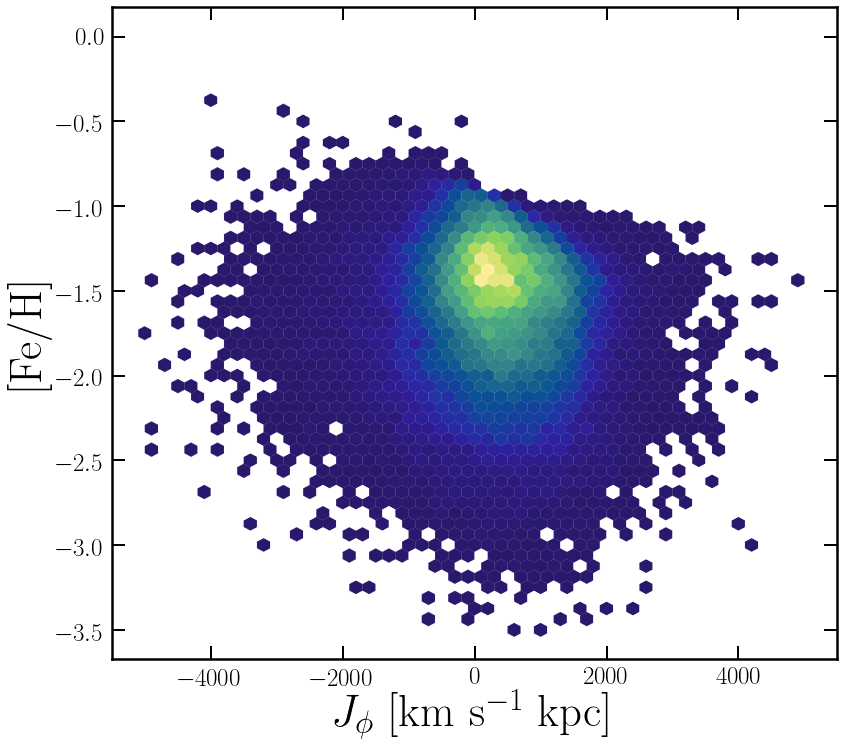

In [41]:
xlab1 = r"$J_\phi$ [km s$^{-1}$ kpc]"
ylab1 = r"[Fe/H]"
fig,ax1 = MySquarePlot(xlab1,ylab1)

cmap = cmocean.cm.haline
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

ax1.hexbin(df.Jphi,df.feh,extent=(-5000,5000,-3.5,0), gridsize=50,cmap=cmap,vmin=0.01,linewidths=0.2)

# Plot some shards
shards_color = 'limegreen'
Examples = names[0:30]
n_ex = size(Examples)
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    Ec = (Cand_matched.E/1e5).tolist()
    jr = (Cand_matched.JR).tolist()
    jphi = (Cand_matched.Jphi).tolist()
    jz = (Cand_matched.Jz).tolist()
    #ax1.plot(vphi,Ec,'.',color=shards_color,markersize=7)
    
# Save
plt.show()
#pltname = 'Jphi-feh'
#fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
#fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            

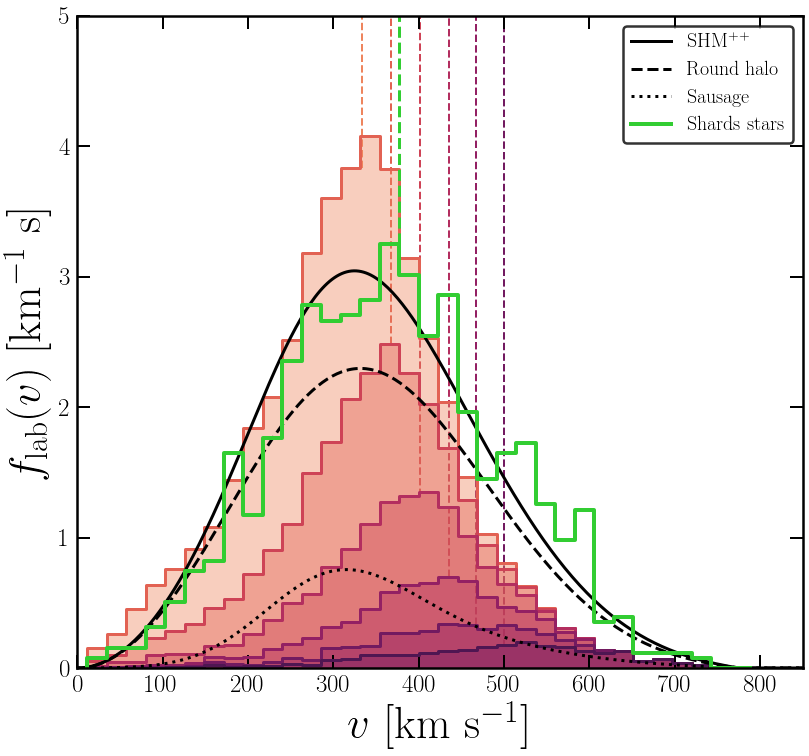

In [209]:
xlab1 = r"$v$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm lab}(v)$ [km$^{-1}$ s]"
fig,ax1 = MySquarePlot(xlab1,ylab1)


day = 67
v_lab = LabVelocitySimple(day)
eta = 0.2
SCO = True
fv_Iso_lab = SpeedDist_Triaxial(v,67,sig_iso,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_lab = SpeedDist_Triaxial(v,67,sig_beta,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_lab + eta*fv_Saus_lab

# Shards
nbins = 35
vv = sqrt((df_S.GalRVel-v_lab[0])**2.0+(df_S.GalTVel-v_lab[1])**2.0+(df_S.GalzVel-v_lab[2])**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,800))
vc = (vbins[1:]+vbins[0:-1])/2

def speeds(dfc):
    return sqrt((dfc.GalRVel-v_lab[0])**2.0+(dfc.GalphiVel-v_lab[1])**2.0+(dfc.GalzVel-v_lab[2])**2.0)

df_E0 = df.loc[(df['E'] > -1.5e5)]
df_E1 = df.loc[(df['E'] > -1.4e5)]
df_E2 = df.loc[(df['E'] > -1.3e5)]
df_E3 = df.loc[(df['E'] > -1.2e5)]
df_E4 = df.loc[(df['E'] > -1.1e5)]
df_E5 = df.loc[(df['E'] > -1.0e5)]

h_E0,_ = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,800))
h_E1,_ = histogram(speeds(df_E1),bins=nbins,normed=True,range=(0,800))
h_E2,_ = histogram(speeds(df_E2),bins=nbins,normed=True,range=(0,800))
h_E3,_ = histogram(speeds(df_E3),bins=nbins,normed=True,range=(0,800))
h_E4,_ = histogram(speeds(df_E4),bins=nbins,normed=True,range=(0,800))
h_E5,_ = histogram(speeds(df_E5),bins=nbins,normed=True,range=(0,800))

h_E0 *= (shape(df_E0)[0])/(1.0*shape(df)[0])
h_E1 *= (shape(df_E1)[0])/(1.0*shape(df)[0])
h_E2 *= (shape(df_E2)[0])/(1.0*shape(df)[0])
h_E3 *= (shape(df_E3)[0])/(1.0*shape(df)[0])
h_E4 *= (shape(df_E4)[0])/(1.0*shape(df)[0])
h_E5 *= (shape(df_E5)[0])/(1.0*shape(df)[0])

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
coff = 3
alph = 0.4

ax1.fill_between(vc,1e3*h_E0,y2=0,color=col_ex[0+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E1,y2=0,color=col_ex[1+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E2,y2=0,color=col_ex[2+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E3,y2=0,color=col_ex[3+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E4,y2=0,color=col_ex[4+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E5,y2=0,color=col_ex[5+coff,:],lw=None,alpha=alph,step='pre',zorder=0)

ax1.step(vc,1e3*h_E0,'-',color=col_ex[1+coff,:],lw=3)
ax1.step(vc,1e3*h_E1,'-',color=col_ex[2+coff,:],lw=3)
ax1.step(vc,1e3*h_E2,'-',color=col_ex[3+coff,:],lw=3)
ax1.step(vc,1e3*h_E3,'-',color=col_ex[4+coff,:],lw=3)
ax1.step(vc,1e3*h_E4,'-',color=col_ex[5+coff,:],lw=3)
ax1.step(vc,1e3*h_E5,'-',color=col_ex[6+coff,:],lw=3)

ax1.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
ax1.plot(v,1e3*(1-eta)*fv_Iso_lab,'k--',lw=3,label='Round halo')
ax1.plot(v,1e3*eta*fv_Saus_lab,'k:',lw=3,label='Sausage')
ax1.step(vc,1e3*h_shards,'-',color=shards_color,lw=4,label='Shards stars')

mean_shards = mean(vv)
hmean_shards = 1e3*h_shards[argmin(abs(vc-mean_shards))]
ax1.plot([mean_shards,mean_shards],[hmean_shards,10.0],'--',color=shards_color,lw=3)
mean0 = mean(speeds(df_E0))
mean1 = mean(speeds(df_E1))
mean2 = mean(speeds(df_E2))
mean3 = mean(speeds(df_E3))
mean4 = mean(speeds(df_E4))
mean5 = mean(speeds(df_E5))
hmean0 = 1e3*h_E0[argmin(abs(vc-mean0))]
hmean1 = 1e3*h_E1[argmin(abs(vc-mean1))]
hmean2 = 1e3*h_E2[argmin(abs(vc-mean2))]
hmean3 = 1e3*h_E3[argmin(abs(vc-mean3))]
hmean4 = 1e3*h_E4[argmin(abs(vc-mean4))]
hmean5 = 1e3*h_E5[argmin(abs(vc-mean5))]

ax1.plot([mean0,mean0],[hmean0,10.0],'--',color=col_ex[0+coff,:],lw=2,zorder=-10)
ax1.plot([mean1,mean1],[hmean1,10.0],'--',color=col_ex[1+coff,:],lw=2,zorder=-10)
ax1.plot([mean2,mean2],[hmean2,10.0],'--',color=col_ex[2+coff,:],lw=2,zorder=-10)
ax1.plot([mean3,mean3],[hmean3,10.0],'--',color=col_ex[3+coff,:],lw=2,zorder=-10)
ax1.plot([mean4,mean4],[hmean4,10.0],'--',color=col_ex[4+coff,:],lw=2,zorder=-10)
ax1.plot([mean5,mean5],[hmean5,10.0],'--',color=col_ex[5+coff,:],lw=2,zorder=-10)

# Legend lines
leg = ax1.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
ax1.set_xlim([0,850])
ax1.set_ylim(bottom=0.0,top=5.)
#plt.gcf().text(0.55,0.75,ylab2,fontsize=40)

# Save
plt.show()
pltname = 'fvlab_highE'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')     

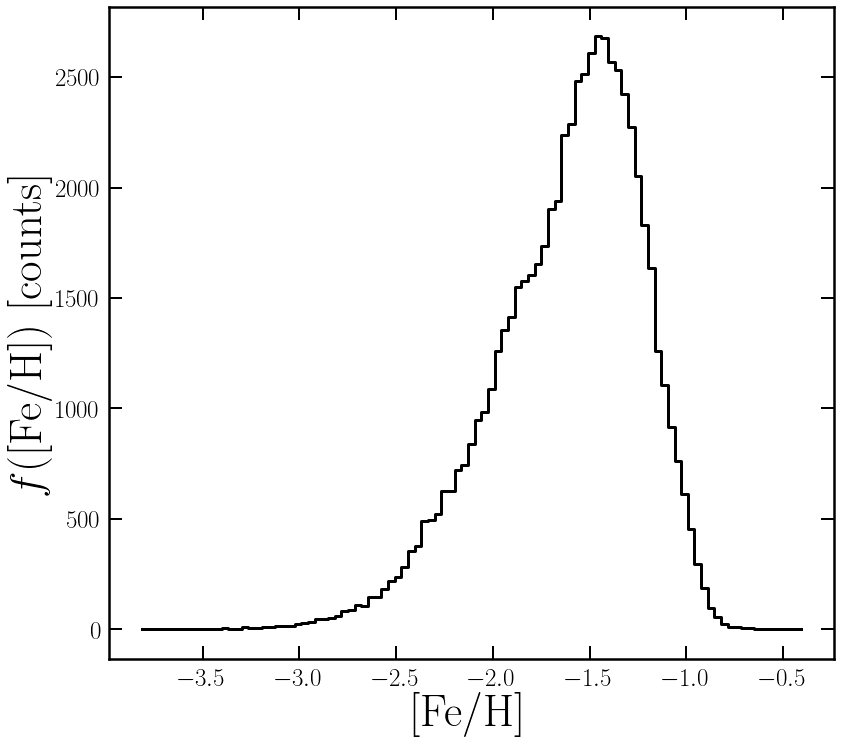

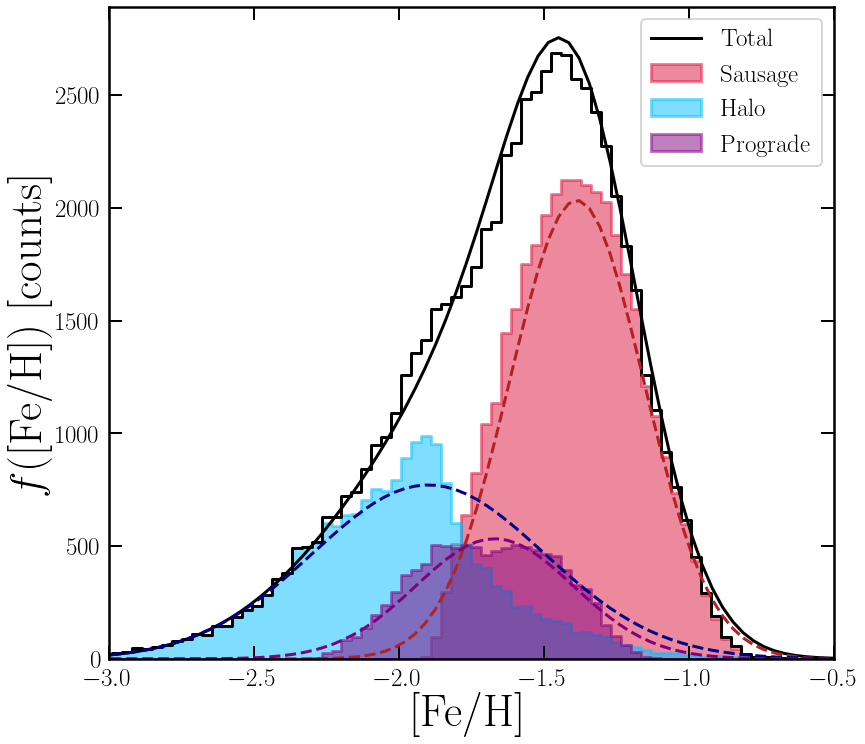

In [344]:
xlab1 = r"[Fe/H]"
ylab1 = r"$f([$Fe/H$])$ [counts]"
fig,ax1 = MySquarePlot(xlab1,ylab1)



nbins = 100
nfine = 100
feh_fine = linspace(-3.5,0,nfine)

h,fehe = histogram(df.feh,bins=nbins)
fehc = (fehe[1:]+fehe[0:-1])/2.0
plt.step(fehc,h,lw=3,color='k')

# Fit data
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]
feh1 = (df1.feh).as_matrix()
feh2 = (df2.feh).as_matrix()
feh3 = (df3.feh).as_matrix()

h1,_ = histogram(feh1,bins=fehe)
h2,_ = histogram(feh2,bins=fehe)
h3,_ = histogram(feh3,bins=fehe)
plt.fill_between(fehc,h1,lw=3,alpha=0.5,facecolor='Crimson',edgecolor='Crimson',step='pre',label='Sausage')
plt.fill_between(fehc,h2,lw=3,alpha=0.5,facecolor='deepskyblue',edgecolor='deepskyblue',step='pre',label='Halo')
plt.fill_between(fehc,h3,lw=3,alpha=0.5,facecolor='purple',edgecolor='purple',step='pre',label='Prograde')


# Analytic models for metallicity
N = sum(h)*(feh_fine[2]-feh_fine[1])

mu = meens[0,3]
sigsq = covs[0,3,3]
f0 = (1.0/sqrt(2*pi*sigsq))*exp(-(feh_fine-mu)**2.0/(2*sigsq))
f0 /= trapz(f0,feh_fine)

mu = meens[1,3]
sigsq = covs[1,3,3]
f1 = (1.0/sqrt(2*pi*sigsq))*exp(-(feh_fine-mu)**2.0/(2*sigsq))
f1 /= trapz(f1,feh_fine)

mu = meens[2,3]
sigsq = covs[2,3,3]
f2 = (1.0/sqrt(2*pi*sigsq))*exp(-(feh_fine-mu)**2.0/(2*sigsq))
f2 /= trapz(f2,feh_fine)


plt.plot(feh_fine,N*ws[0]*f0+N*ws[1]*f1+N*ws[2]*f2,'k-',lw=3,label='Total')
plt.plot(feh_fine,N*ws[0]*f0,'k--',lw=3,color='Firebrick')
plt.plot(feh_fine,N*ws[1]*f1,'k--',lw=3,color='Darkblue')
plt.plot(feh_fine,N*ws[2]*f2,'k--',lw=3,color='Purple')

leg = plt.legend()
leg.get_frame().set_linewidth(2)

ax1.set_ylim(bottom=0.0)
ax1.set_xlim([-3.0,-0.5])
pltname = 'feh-SausageHaloPrograde'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  



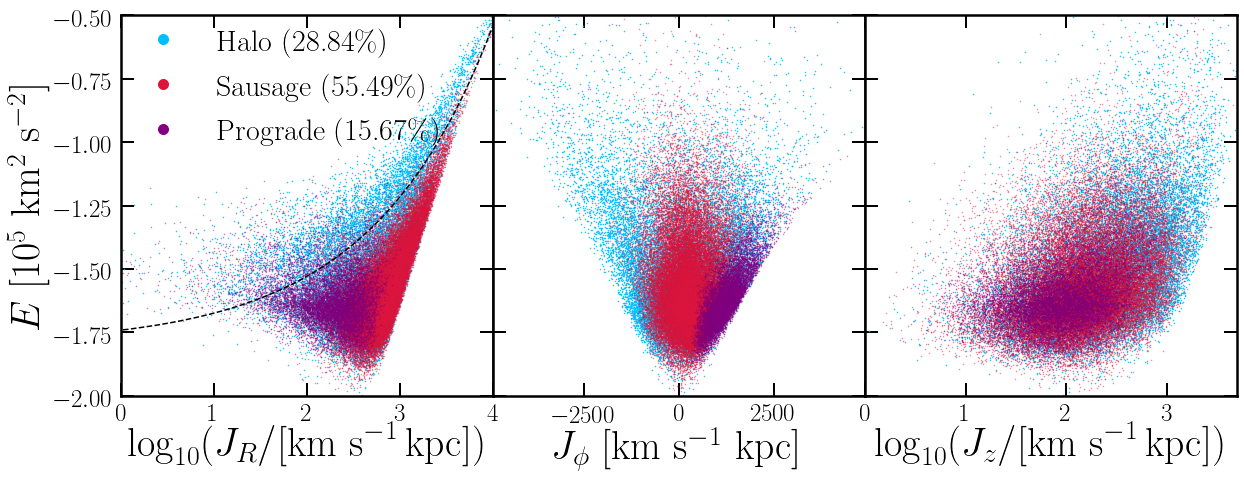

In [345]:
rlab = r'$\log_{10}(J_R/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
plab = '$J_\phi$ [km s$^{-1}$ kpc]'
zlab = r'$\log_{10}(J_z/[\textrm{km s}^{-1}\,\textrm{kpc}])$'
Elab = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
Emax = -0.5
Emin = -2.0
jrmin = 1.0
jrmax = 10000.0
jpmin = -4900.0
jpmax = 4900.0
jzmin = 1.0
jzmax = 5000.0

fig,ax1,ax2,ax3 = MyTriplePlot(rlab,Elab,plab,'',zlab,'',wspace=0.0,lfs=40)

# choose cut
eta1 = 100*sum(imod==0)/(1.0*shape(df)[0])
eta2 = 100*sum(imod==1)/(1.0*shape(df)[0])
eta3 = 100*sum(imod==2)/(1.0*shape(df)[0])

df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]

E1 = (df1.E/1e5).as_matrix()
Jr1 = (df1.JR).as_matrix()
Jp1 = (df1.Jphi).as_matrix()
Jz1 = (df1.Jz).as_matrix()
E2 = (df2.E/1e5).as_matrix()
Jr2 = (df2.JR).as_matrix()
Jp2 = (df2.Jphi).as_matrix()
Jz2 = (df2.Jz).as_matrix()
E3 = (df3.E/1e5).as_matrix()
Jr3 = (df3.JR).as_matrix()
Jp3 = (df3.Jphi).as_matrix()
Jz3 = (df3.Jz).as_matrix()

ax1.plot(log10(Jr2),E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax1.plot(log10(Jr1),E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)
ax1.plot(log10(Jr3),E3,'.',color='purple',markersize=1,alpha=0.5,rasterized=True)

x = linspace(10.0**jmin,10.0**jmax,10000)
y = (x/5000)**(1.0/3.0)-1.8
ax1.plot(log10(x),y,'k--')

ax2.plot(Jp2,E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax2.plot(Jp1,E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)
ax2.plot(Jp3,E3,'.',color='purple',markersize=1,alpha=0.5,rasterized=True)

ax3.plot(log10(Jz2),E2,'.',color='deepskyblue',markersize=1,rasterized=True)
ax3.plot(log10(Jz1),E1,'.',color='crimson',markersize=1,alpha=0.5,rasterized=True)
ax3.plot(log10(Jz3),E3,'.',color='purple',markersize=1,alpha=0.5,rasterized=True)

ax3.plot(-1,100,'.',color='deepskyblue',markersize=20,rasterized=True,label=r'Halo ('+r'{:.2f}'.format(eta2)+'\%) ')
ax3.plot(-1,100,'.',color='crimson',markersize=20,rasterized=True,label=r'Sausage ('+r'{:.2f}'.format(eta1)+'\%) ')
ax3.plot(-1,100,'.',color='purple',markersize=20,rasterized=True,label=r'Prograde ('+r'{:.2f}'.format(eta3)+'\%) ')

plt.legend(fontsize=30,frameon=False,bbox_to_anchor=(-2.0, 1.0), loc=2, borderaxespad=0.)


# # Plot shards
# Examples = names[0:10]
# n_ex = size(Examples)
# for i in range(0,n_ex):
#     namei = Examples[i]
#     Cand = df_S.loc[df_S['group_id'] == namei]
#     Cand1 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
#     Cand2 = df2.loc[around(df2.ra,8).isin(Cand.ra)]
#     e1 = (Cand1.E/1e5).as_matrix()
#     jr1 = (Cand1.iloc[:,icol]).as_matrix()
#     e2 = (Cand2.E/1e5).as_matrix()
#     jr2 = (Cand2.JR).as_matrix()

#     ax1.plot(log10(jr2),e2,'o',color='deepskyblue',markersize=2,markerfacecolor='none')
#     ax1.plot(log10(jr1),e1,'o',color='crimson',markersize=2,markerfacecolor='none')    

ax2.set_yticklabels([])
ax3.set_yticklabels([])

   
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])

ax1.set_xlim([log10(jrmin),log10(jrmax)])
ax2.set_xlim([jpmin,jpmax])
ax3.set_xlim([log10(jzmin),log10(jzmax)])

# Save
pltname = 'Actions-SausageHaloPrograde'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  


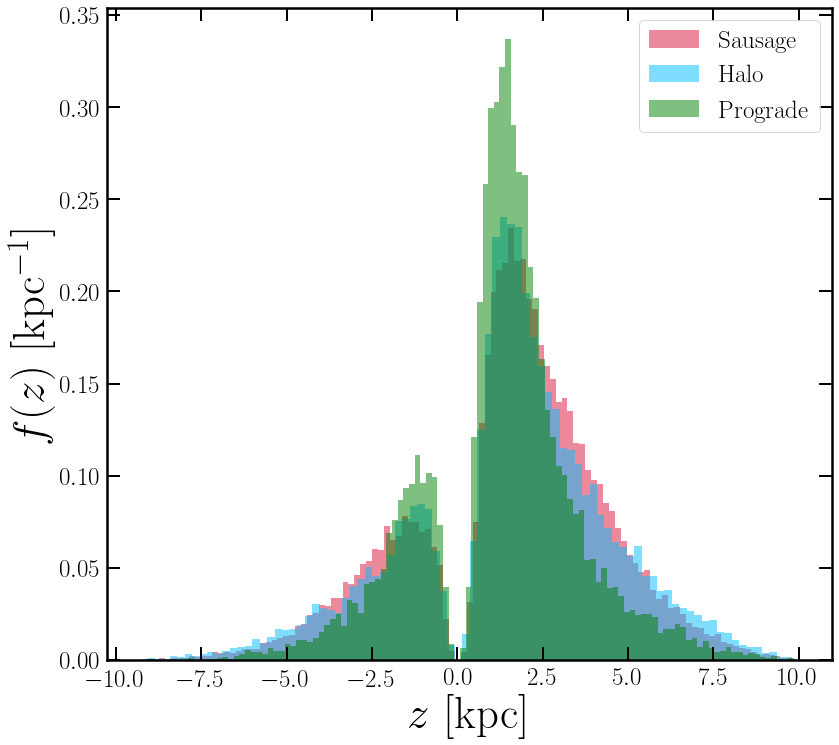

In [301]:
xlab1 = r'$z$ [kpc]'
ylab1 = r'$f(z)$ [kpc$^{-1}$]'
fig,ax1 = MySquarePlot(xlab1,ylab1)



#x1,y1,dens1 = PointScatter(x,z)
#ax1.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)
#ax1.hexbin(x,z,extent=(0,16,-10,10), gridsize=120,cmap=cmap,vmin=0.01,linewidths=0.2)

#plt.hist((df.GalRecZ).as_matrix(),bins='fd',color='k',normed=True)
plt.hist(((df1.GalRecZ).as_matrix()),bins='fd',color='crimson',alpha=0.5,normed=True,label='Sausage')
plt.hist(((df2.GalRecZ).as_matrix()),bins='fd',color='deepskyblue',alpha=0.5,normed=True,label='Halo')
plt.hist(((df3.GalRecZ).as_matrix()),bins='fd',color='green',alpha=0.5,normed=True,label='Prograde')


zz = linspace(0,10,100)
R = 8.0
rho_thind = 1.3*exp(-abs(zz)/0.3)
rho_thickd = 1.3*exp(-abs(zz)/0.9)

#plt.plot(zz,rho_thind,'k--')
#plt.plot(zz,rho_thickd,'k-')


plt.legend()
plt.show()


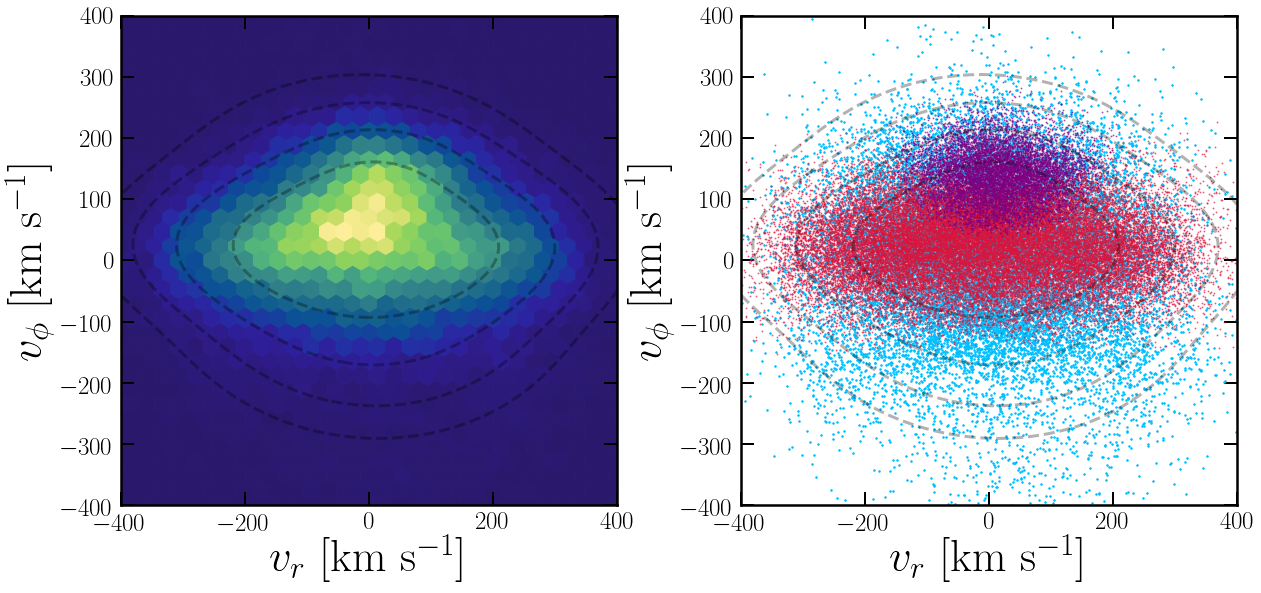

In [346]:
xlab1 = r'$v_r$ [km s$^{-1}$]'
ylab1 = r'$v_\phi$ [km s$^{-1}$]'
fig,ax1,ax2 = MyDoublePlot(xlab1,ylab1,xlab1,ylab1,size_y=9)

vr1 = (df1.GalRVel).as_matrix()
vp1 = (df1.GalphiVel).as_matrix()

vr2 = (df2.GalRVel).as_matrix()
vp2 = (df2.GalphiVel).as_matrix()

vr3 = (df3.GalRVel).as_matrix()
vp3 = (df3.GalphiVel).as_matrix()

ax2.plot(vr2,vp2,'.',color='deepskyblue',markersize=3,rasterized=True)
ax2.plot(vr1,vp1,'.',color='crimson',markersize=2,alpha=0.5,rasterized=True)
ax2.plot(vr3,vp3,'.',color='purple',markersize=2,alpha=0.5,rasterized=True)



def fv_2D_an(covs,meens,ws,V1,V2,clf,i,j):
    fv = zeros(shape=shape(V1))
    if ndim(covs)>2:
        nm = shape(covs)[0]
    else:
        nm = 1
    for k in range(0,nm): 
        if nm>1:
            U = squeeze(linalg.inv(covs[k,:,:]))
            v10 = meens[k,i]
            v20 = meens[k,j]
            w0 = ws[k]
        else:
            U = squeeze(linalg.inv(covs[:,:]))
            v10 = meens[i]
            v20 = meens[j]
            w0 = ws
        U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
        V = vstack((U[i,:],U[j,:]))    
        V = delete(V, (i,j), axis=1)

        W = delete(U, (i,j), axis=0)
        W = delete(W, (i,j), axis=1)
        Uoff = linalg.multi_dot([V, linalg.inv(W), V.T])
        Ut = U0-Uoff
        V1o = V1-v10
        V2o = V2-v20
        Norm = 1.0
        fv += w0*Norm*exp(-0.5*(V1o**2.0*Ut[0,0]+V2o**2.0*Ut[1,1]+2*V1o*V2o*Ut[1,0]))  
    return fv


ax1.hexbin(df.GalRVel,df.GalphiVel,extent=(-400,400,-400,400),gridsize=30,cmap=cmap)

vc1 = linspace(-400,400,100)
vc2 =  linspace(-400,400,100)
VC1,VC2 = meshgrid(vc1,vc2)
Han = fv_2D_an(covs,meens,ws,VC1,VC2,clf,0,1)
levels = [-4,-3,-2,-1,0]
ax1.contour(vc1,vc2,log(Han/amax(Han)),levels=levels,alpha=0.3,colors='k',linewidths=3,zorder=10)
ax2.contour(vc1,vc2,log(Han/amax(Han)),levels=levels,alpha=0.3,colors='k',linewidths=3,zorder=10)

ax1.set_xlim([-400,400])
ax2.set_xlim([-400,400])
ax1.set_ylim([-400,400])
ax2.set_ylim([-400,400])


# Save
pltname = 'vrvphi-SausageHaloPrograde'
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')  


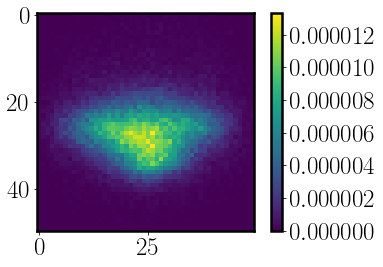

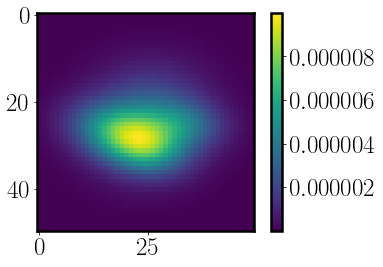

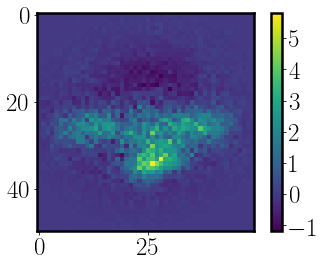

In [353]:
# Fit data
means_init = zeros(shape=(4,4))
means_init[0,:] = array([-170.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([170.0,0.0,0.0,-1.4]) # Halo
means_init[2,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[3,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.25,0.25,0.34,0.16])

covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=4, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_



H,vb1,vb2 = histogram2d(df.GalRVel,df.GalphiVel,range=((-400,400),(-400,400)),bins=50,normed=True)
vc1 = (vb1[1:]+vb1[0:-1])/2
vc2 = (vb2[1:]+vb2[0:-1])/2

VC1,VC2 = meshgrid(vc1,vc2)
Han = 2*fv_2D_an(covs,meens,ws,VC1,VC2,clf,0,1)/((vc1[2]-vc[1])**2.0)


plt.imshow(H.T)
plt.colorbar()
plt.show()


plt.imshow(Han)
plt.colorbar()
plt.show()


plt.imshow((H.T-Han)*1e6)
plt.colorbar()
plt.show()

In [342]:
ws

array([ 0.50696545,  0.32895214,  0.16408241])